# Introduction to Neural Network classification with TensorFlow

A classification problem is where you try to classify something as one thing or another.   
We have:
* Binary Classification: we have two labels (e.g. spam or not spam)
* Multiclass Classification: we have more than two labels (eg. dog, human, flower)
* Multilabel Classification: we need to associate many labels to a predication (eg. associate tags to a given text)


In [1]:
from sklearn.datasets import make_circles
from tensorflow.keras.datasets import fashion_mnist

import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sb

import itertools
import random

%matplotlib inline

In [2]:
import tensorflow as tf
tf.__version__

'2.10.0'

## Creating binary dataset to work on

In [3]:
n_samples = 1000
X,y = make_circles(n_samples,noise=.03,random_state=42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y[:9]

array([1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X[0]

array([0.75424625, 0.23148074])

In [8]:
y[0]

1

Let's visualize the data

In [9]:
circle_df = pd.DataFrame({
    "X0":X[:,0],
    "X1":X[:,1],
    "label":y
})
circle_df.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


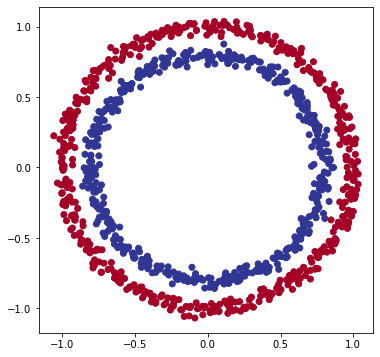

In [10]:
plt.figure(figsize=[6,6])

plt.scatter(data=circle_df, x="X0",y="X1",c="label", cmap=plt.cm.RdYlBu);

The model we want to build will tell wether a given point is red or blue

🛠️ **Exercise**: Spend some 20 minutes playing around with [https://playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.14726&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) building and running different neural networks. See what happens when you change different hyperparameters.

## Steps in creating a classification model
Those steps are:
1. Create or import a model
1. Compile the model
1. Fit the model
1. Evaluate the model
1. Tweak the model
1. Evaluate the model
1. An iteration of the previous two steps

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creating a model using the Sequential API
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), #.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X,y, epochs=5, verbose=1)

Epoch 1/5
32/32 [==============================] - 3s 4ms/step - loss: 5.9308 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 4.9822 - accuracy: 0.4600
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 4.4290 - accuracy: 0.4680
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 4.2251 - accuracy: 0.4990
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 7.7130 - accuracy: 0.5000


The accuracy is 0.4960, 49.6%. This means that on average, out of 100 examples, the model only gets 50 examples right. This in turn mean that the model is basically guessing.

Let's try and improve the model by training for longer.

In [12]:
# Let's train for 200 more epochs (for a total of 205 epochs)
history = model_1.fit(X,y, epochs=200, verbose=1)

Epoch 1/200
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/200
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 93/200


32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 165/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 166/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 167/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 168/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 169/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 170/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 171/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 172/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 173/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoc

The accuracy here is 0.4810, 48%. The model performance did not improved that much.

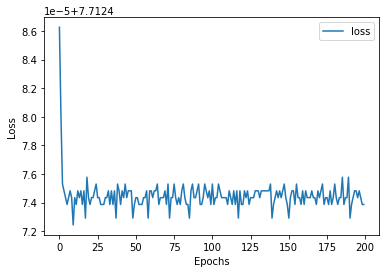

In [13]:
# Plot history
history_df = pd.DataFrame(history.history)
history_df.plot(kind="line",y="loss")
plt.ylabel("Loss")
plt.xlabel("Epochs");

And looking at the plot, our model is performing really poorly and seems unable to converge.

Let's try to improve the model by setting an extra layer.

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
history_2 = model_2.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0974 - accuracy: 0.4730
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4650
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4640
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5150
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4960
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4690
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4740
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4880
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4930
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5100
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.4750
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4600
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4760
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5030
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4930
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4980
Epoch 93/100


The accuracy of model_2 is about the same as model_1 even with an extra layer.

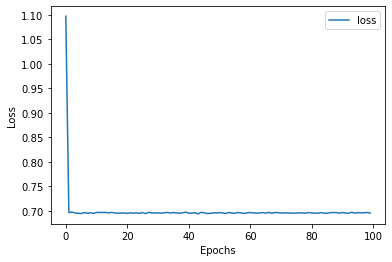

In [15]:
# Plot history
history_df2 = pd.DataFrame(history_2.history)
history_df2.plot(kind="line",y="loss")
plt.ylabel("Loss")
plt.xlabel("Epochs");

We can also see from the above plot that the model is no more improving after its first epoch.

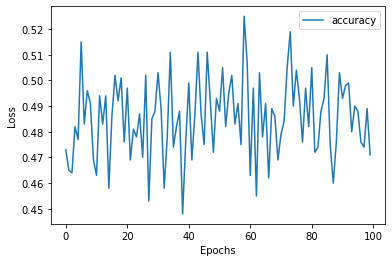

In [16]:
history_df2.plot(kind="line",y="accuracy")
plt.ylabel("Loss")
plt.xlabel("Epochs");

## Improving a model

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Creating a model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Improving the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3. Fit the model
history_3 = model_3.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.3459 - accuracy: 0.4510
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7813 - accuracy: 0.4580
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7243 - accuracy: 0.4670
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7088 - accuracy: 0.4350
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7007 - accuracy: 0.4970
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4560
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4610
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4980
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4710
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5150
Epoch 87/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.4630
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4570
Epoch 89/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.4750
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.4720
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4970
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.4870
Epoch 93/100


The accuracy, 0.4970 (49.7%), is still about the same as that of the old models.

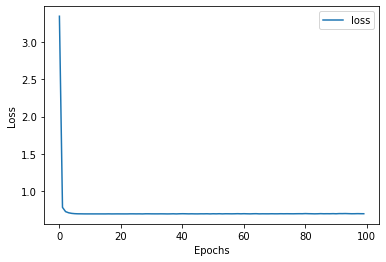

In [18]:
# Plot history
history_df3 = pd.DataFrame(history_3.history)
history_df3.plot(kind="line",y="loss")
plt.ylabel("Loss")
plt.xlabel("Epochs");

Looking at the loss evolution over the epochs, the model is not learning anything from the data after its first epoch.

Recalling our ML practioner motto: `visualize, visualize, visualize`. It is good idea to visualize the following as much as possible (specially whenever the model is not performing as wanted):
* the data: to know what is look like
* the model: to know its layers and its differents components
* the training: observing the loss in a plot
* the predictions

We will visualize our model predictions against the label. 

In [19]:
def plot_decision_boundary(model, X, y)->None:
    """
        Plots the decision boundary craeted by a model predicting on X
    
        Params:
            - trained model
            - features (X)
            - label (y)
            
        Do:
            - Create a meshgrid of the different X values
            - Make predictions acorss the meshgrid
            - Plot the prediction as well as a line between the different zones (where each unique class falls)
            
            
        numpy meshgrid: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
        
        Inspired by:
            - https://cs231n.github.io/neural-networks-case-study/
    """
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min = X[:,0].min() - .1  # -0.1 was done to give oursleves a little bit of margin in the future plot
    x_max = X[:,0].max() + .1
    y_min = X[:,1].min() - .1
    y_max = X[:,1].max() + .1
    
    # Create the meshgrid
    xx, yy = np.meshgrid( np.linspace(x_min,x_max,100),
                          np.linspace(y_min,y_max,100))
    
    # Create new X values (predictions will be make on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class or binary-class classification
    if len(y_pred[0])>1:
        print("Doing multi-class classification")
        # Reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing binary classification


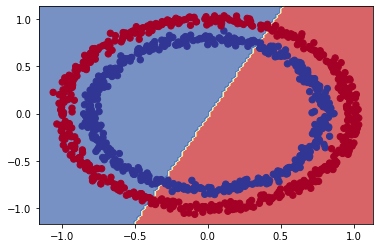

In [20]:
# Check out the predictons our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

The above plot explains why the model is performing poorly: it looks like it's trying to draw straight line as a decision boundary to separate the data (the white line separating the red zone of the rectangle from the blue zone of the rectangle).      

The issue here is that we have got a circular data (the red and blue points for two circles), so they are not separable by a straight line. If we were working on a regression problem, our current model might actually work, but for our current problem the model is inappropriate.

## Non-linearity in a model

Let's try to use a model based on a linear activation function to make predictions.

In [21]:
# Set seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=.001),
               metrics=["accuracy"])

# 3. Fit the model
history_4 = model_4.fit(X,y,epochs=100,verbose=1)

Epoch 1/100


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 4.2751 - accuracy: 0.4920
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1963 - accuracy: 0.4540
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1092 - accuracy: 0.4210
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0010 - accuracy: 0.4110
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7938 - accuracy: 0.4130
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6491 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.4948 - accuracy: 0.4200
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.3703 - accuracy: 0.4220
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.2271 - accuracy: 0.4210
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 2.9402 - accuracy: 0.4230
Epoch 11/100
32/32 [=

32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4830
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4860
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4860
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4860
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4870
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4850
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4850
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4870
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 93/100


The accuracy is 0.4740 (47.4%), the model is still performing poorly.

Let's remind ourselves of what our data looks like, because whenever our model predictions are not working very well, we can evaluate our model by looking at the evaluation metrics or we can adhere to our ML practionner motto: visualize.

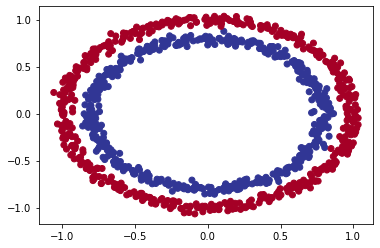

In [22]:
# Reminding ourselve of what our data looks like
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
Doing binary classification


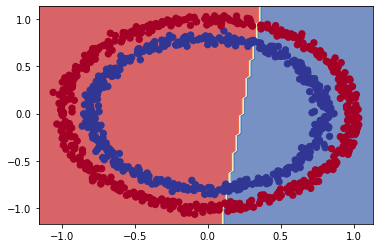

In [23]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,X=X, y=y)

* Everything in the yellow zone could be blue or red point (which is why the model is performing so poorly)
* Everything in the red zone is classified as red point
* Everything in the blue zone is classified as blue point

Let's try to build a neural network with a non-linear activation function.

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=.001),
               metrics=["accuracy"])

# 3. Fit the model
history_5 = model_5.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.2902 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2844 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2815 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2804 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2540 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2460 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2456 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2456 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2455 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2455 - accuracy: 0.4850
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 6.2064 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2064 - accuracy: 0.4840
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2064 - accuracy: 0.4840
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2064 - accuracy: 0.4840
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2064 - accuracy: 0.4840
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2064 - accuracy: 0.4840
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2064 - accuracy: 0.4840
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2064 - accuracy: 0.4840
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2063 - accuracy: 0.4840
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2063 - accuracy: 0.4840
Epoch 93/100


The accuracy is 0.4720 (47.2%). The model is still performing poorly.

We are going to build a more complex model, with a non-line

In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])

# 3. Fit the model
history_6= model_6.fit(X,y,epochs=200, verbose=1)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 1.3300 - accuracy: 0.4500
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 1.0509 - accuracy: 0.4590
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.9763 - accuracy: 0.4670
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.9311 - accuracy: 0.4610
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.8961 - accuracy: 0.4670
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8684 - accuracy: 0.4580
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8465 - accuracy: 0.4650
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8292 - accuracy: 0.4600
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8139 - accuracy: 0.4390
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8014 - accuracy: 0.4160
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.3767 - accuracy: 0.9100
Epoch 84/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3691 - accuracy: 0.9100
Epoch 85/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.9150
Epoch 86/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3574 - accuracy: 0.9110
Epoch 87/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3493 - accuracy: 0.9200
Epoch 88/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3421 - accuracy: 0.9200
Epoch 89/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.9190
Epoch 90/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.9180
Epoch 91/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3227 - accuracy: 0.9220
Epoch 92/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3153 - accuracy: 0.9300
Epoch 93/200


32/32 [==============================] - 0s 3ms/step - loss: 0.0947 - accuracy: 0.9820
Epoch 165/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.9780
Epoch 166/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0945 - accuracy: 0.9770
Epoch 167/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.9800
Epoch 168/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0922 - accuracy: 0.9820
Epoch 169/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0903 - accuracy: 0.9840
Epoch 170/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9810
Epoch 171/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 0.9830
Epoch 172/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0890 - accuracy: 0.9820
Epoch 173/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9800
Epoc

The accuracy is 0.9620 (96%). This means that out of 100 predictions, 96 are made right.

313/313 [==============================] - 1s 2ms/step
Doing binary classification


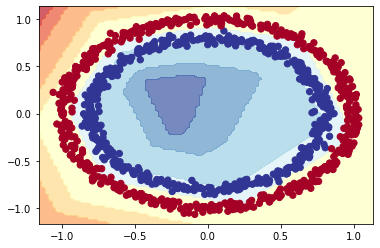

In [26]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_6,X=X, y=y)

Looking at the plot, the model has a nearly perfect decision boundary (which explain the high accuracy), but it's in doubt about the position blue and right zones (we can see that by the fact there are hue in the zones). Let's try to resolve that by putting an activation function on the last layer.

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # we are using sigmoid activation on the last layer because it is a binary classification problem
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=.001),
               metrics=["accuracy"])

# 3. Fit the model
history_7= model_7.fit(X,y,epochs=200, verbose=1)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 0.7066 - accuracy: 0.5020
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7012 - accuracy: 0.4940
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.4930
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4960
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.4910
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4880
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4910
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4970
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5020
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.4770
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.5541 - accuracy: 0.7490
Epoch 84/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5503 - accuracy: 0.7780
Epoch 85/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5470 - accuracy: 0.7710
Epoch 86/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.7730
Epoch 87/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.7700
Epoch 88/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5373 - accuracy: 0.7610
Epoch 89/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5345 - accuracy: 0.7730
Epoch 90/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5316 - accuracy: 0.7540
Epoch 91/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.7830
Epoch 92/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.7960
Epoch 93/200


32/32 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8660
Epoch 165/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3768 - accuracy: 0.8650
Epoch 166/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8690
Epoch 167/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8690
Epoch 168/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8680
Epoch 169/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3705 - accuracy: 0.8690
Epoch 170/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8710
Epoch 171/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8700
Epoch 172/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8700
Epoch 173/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8700
Epoc

The accuracy for our last model is 0.9980 (99.8%). This means that out 100 predictions, all of them are made right. This model is a good one.

Let's visualize what how our model is performing on the data.

313/313 [==============================] - 1s 2ms/step
Doing binary classification


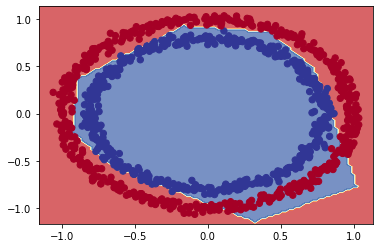

In [28]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_7,X=X, y=y)

The model has an excellent decision boundary, which explain why it is performing so well on the data.

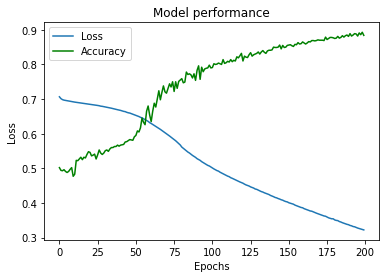

In [29]:
# Plot history
history_df7 = pd.DataFrame(history_7.history)

sb.lineplot(data=history_df7, y="loss", x=range(0,200),  label="Loss" )
sb.lineplot(data=history_df7, y="accuracy", x=range(0,200), color="green", label="Accuracy" )

plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(loc="upper left")

plt.title("Model performance");

## Understanding how activation functions work

The combination of linear (straight lines) and non-linear (non-straight lines) is one of the key fundamental of how a neural networks work.
An activation function somewhat tells the neural network if a given layer should draw a straight or a non-straight line, and how it should draw it.

Read [https://www.v7labs.com/blog/neural-networks-activation-functions](https://www.v7labs.com/blog/neural-networks-activation-functions) for further details.

Let's see how activation functions work.

In [30]:
# Create a toy tensor (similar to the data we pass to our models)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

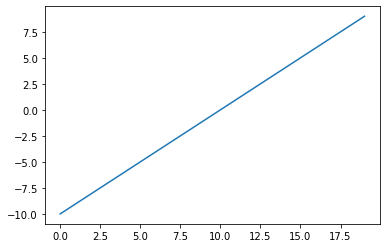

In [31]:
# Visualize the toy tensor
plt.plot(A);

Our tensor is a straight line. Let's try to apply a sigmoid function on it to see what it will become.

In [32]:
# Define a sigmoid function: sigmoid(x) = 1 / ( 1 + exp(-x) )
def sigmoid(x):
    return 1 / (1 + tf.exp(-x) )

# Test the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

Now let us see what our data looks like after the sigmoid function is applied to it. Recall that the data was originally a straight line.

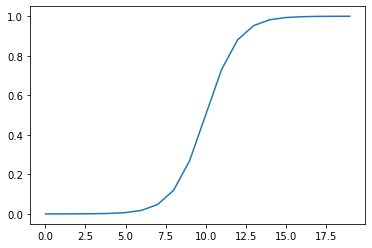

In [33]:
plt.plot(sigmoid(A));

The data on which a sigmoid function is applied is now a non-straight line. That is what an activation function does: it introduce non-linearity in a model.

According to [https://www.v7labs.com/blog/neural-networks-activation-functions](https://www.v7labs.com/blog/neural-networks-activation-functions):

*Activation functions introduce an additional step at each layer during the forward propagation, but its computation is worth it. Here is why—  <br/>
Let’s suppose we have a neural network working without the activation functions.<br/>
In that case, every neuron will only be performing a linear transformation on the inputs using the weights and biases. It’s because it doesn’t matter how many hidden layers we attach in the neural network; all layers will behave in the same way because the composition of two linear functions is a linear function itself. <br/>
Although the neural network becomes simpler, learning any complex task is impossible, and our model would be just a linear regression model.*

The same article talks about activation functions, and which type of straight or non-straight each line each one draws. 

In [34]:
# Let's try to replicate relu function: relu(x)= max(0,X)
def relu(x):
    return tf.maximum(0,x)

# Test relu function on our tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

Now let us see what our data looks like after the relu function is applied to it. Recall that the data is originally a straight line.

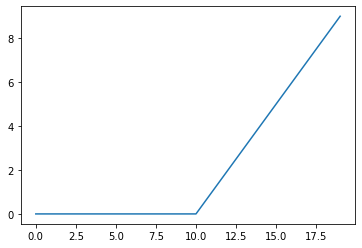

In [35]:
plt.plot(relu(A));

In conclusion, an activation function gives its layer the ability to draw a straight or a non-straight line. In the case of a non-straight line, the specific line is define by the activation function.

📖 : [https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)

## Leveraging the learning rate to improve the model convergence time

From here, we will create a training and a test set.

In [36]:
len(X)

1000

In [37]:
# Split manually into train and test sets
X_train, y_train = X[:800,:], y[:800]
X_test, y_test= X[800:,:], y[800:]
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [38]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=.01), # We set the learning rate to 0.01 (it was 0.001). The learning rate tell by how much the model should update its weights and bias
               metrics=["accuracy"])

# 3. Fit the model
history_8 = model_8.fit(X_train, y_train, epochs=50, verbose=1) # We decrease the epochs to 50

Epoch 1/50


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.6919 - accuracy: 0.4863
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5275
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5263
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5325
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6325
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.5612
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.6700
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.7250
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5967 - accuracy: 0.7237
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5527 - accuracy: 0.8138
Epoch 11/50
25/25 [===========

Because we increase the learning rate, the model learned faster.

In [39]:
# 4. Evaluate the model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9950


[0.030085068196058273, 0.9950000047683716]

On the test set (data that the model has never seen before), we got an accuracy of 96.5% (over a 100 predictions, 96 were made right)

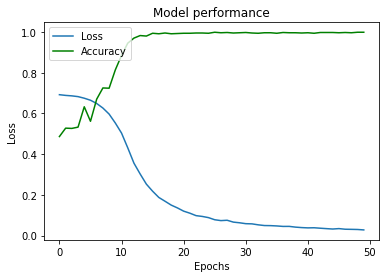

In [40]:
# Plot history
history_df8 = pd.DataFrame(history_8.history)

sb.lineplot(data=history_df8, y="loss", x=range(0,50),  label="Loss" )
sb.lineplot(data=history_df8, y="accuracy", x=range(0,50), color="green", label="Accuracy" )

plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(loc="upper left")

plt.title("Model performance");

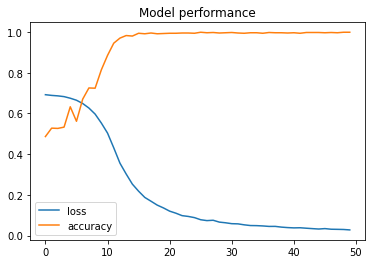

In [41]:
# Another way to make the above plot
history_df8.plot()

plt.title("Model performance");

313/313 [==============================] - 1s 2ms/step
Doing binary classification


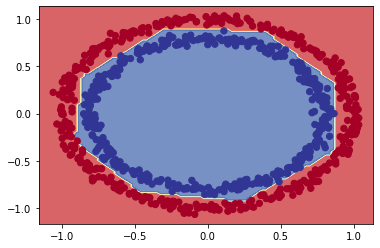

In [42]:
# Plot decision boundary for training set
plot_decision_boundary(model=model_8,X=X_train, y=y_train)

313/313 [==============================] - 1s 2ms/step
Doing binary classification


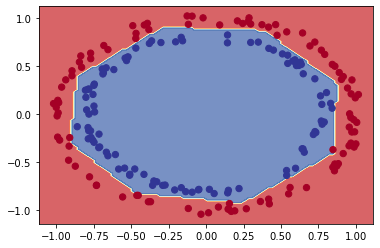

In [43]:
# Plot decision boundary for test set
plot_decision_boundary(model=model_8,X=X_test, y=y_test)

📕 The main takeaway is all we did was took `model_7`, increased its learning rate by 10 times (from 0.001 to 0.01), and the model converged faster.

## Find a model ideal learning rate

In order to find our model ideal learning rate, we are going to have to visualize our loss decreasing and potentially decrease our learning rate during training.     
The plot in the next cell let's visualizing the loss deacreasing.

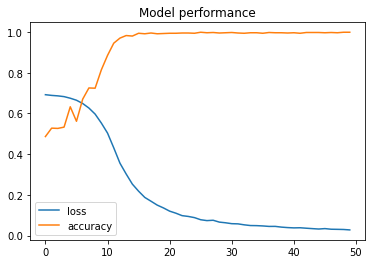

In [44]:
# Observing a model performance in training
history_df8.plot()

plt.title("Model performance");

Now the objective is to update the learning rate during training.

To find the ideal learning rate (the learning rate where the loss decreases the most during training), we are going to use the following steps:
* A **learning rate callback**: it an extra-piece of functionality that can be added to a model while it's training.
* A **modified loss curves plot**: it is similar to the loss curve plotted previously, but we are going to have to modify it because we are going to set up a learning rate callback to start at a certain value of a learning rate and gradually decrease or increase that learning rate during training; and then, we will make another plot of "the loss versus the learning rate" to find out the learning rate value at which the loss decreases the most.

In [45]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# 2a. Compile the model
model_9.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(lr=.01),
               metrics=["accuracy"])

# 2b. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20) )

# The above plot is essentially saying to offer the learning rate scheduler every epcoh to traverse a set of
# learning rate values, starting from 1e-4 and increasing by 10**(epoch/20) every epoch.


# 3. Fit the model
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=1)

Epoch 1/100


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.7013 - accuracy: 0.4900 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5088 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.5113 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5300 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5288 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5063 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6957 - ac

Epoch 73/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8662 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7700 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7725 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.7300 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.7700 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7713 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.7987 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7500 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.7

Our training appears to have gone as usual, except that this time we can notice in the output the learning rate at each epoch is different from the others.

In [46]:
# Looking at the content of the model training history
history_df9 = pd.DataFrame(history_9.history)
history_df9.head()

,loss,accuracy,lr
0,0.701257,0.49000,0.000100
1,0.700659,0.49375,0.000112
2,0.700008,0.49875,0.000126
3,0.699378,0.50875,0.000141
4,0.698664,0.51125,0.000158


Let us notice in that we also have a new column in the history dataframe: the learning rate (lr).

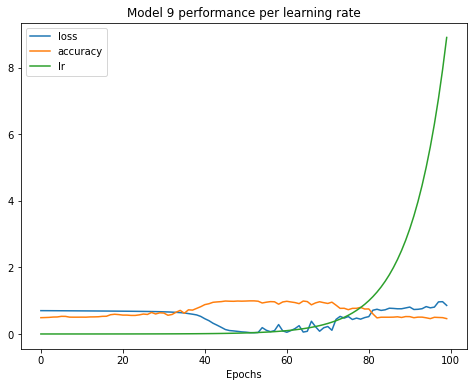

In [47]:
# Model 9 performance
history_df9.plot(figsize=(8,6))

plt.xlabel("Epochs")
plt.title("Model 9 performance per learning rate");

The above plot looks a little bit different to the loss curves created before.     
The accuracy started around 0.5, seems to go up slightly (around 1), then goes down.    
The loss started a little higher than 0.5, then goes down fairly significantly, before increasing again.    

Recall what we want: the learning rate where our loss decreases the fastest. This seems to be between 40-45. We have few ways to find an exact value:
* redo the plot while zoom-in in the x-axis, and maybe defining custom xticks values.
* plot the learning rate versus the loss

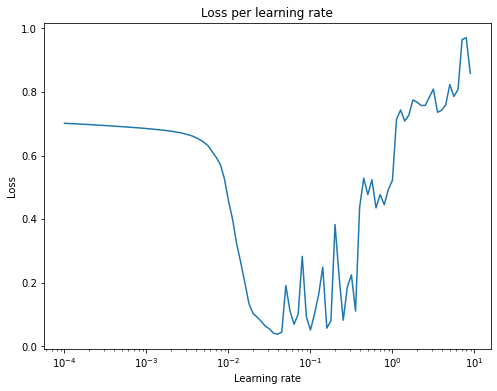

In [48]:
# Plot the learning rate versus the loss

n_epochs=100 # number of epochs we train

# Relicating the formula that was passed to the learning rate scheduler
lrs = 1e-4 * 10**( tf.range(n_epochs)/20 ) # This gives us the learning rate for each epoch
# lrs

plt.figure(figsize=[8,6])

# Make a plot with log scaling on the X axis
plt.semilogx(lrs, history_9.history["loss"]) # the first argument is plotted on the x-axis, the second on the y-axis

plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Loss per learning rate");

🔑 The methodology to figure out the ideal value for learning rate (or at least the ideal value to begin training our model):
1. Take the learning rate value where the loss is still decreasing, but not quite flattened out 
1. It's usually about 10 times smaller than the bottom of the curve.

Looking at the curve, the ideal value for the learning rate is between 0.01 (10e-2) and 0.02 (2*10e-2). We will choose 0.02 as the ideal learning rate.

In [49]:
# Examples of typical ideal learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

One thing that all the above values have in common is that they are all multiple of 10

## Build a model based on the ideal learning rate

In [50]:
ideal_lr = .02 # ideal learning rate: based on the search of the ideal learning rate in the previous section

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# 2. Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=ideal_lr),
                metrics=["accuracy"])

# 3. Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5213
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.5925
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.5838
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6219 - accuracy: 0.6662
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.7750
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.8150
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.8350
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3690 - accuracy: 0.8687
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.9200
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2521 - accuracy: 0.9638
Epoch 11/20
25/25 [===========

The loss is 0.037, and the accuracy 0.998. With the good learning rate, we can see that the model converged faster than those of the past.

In [51]:
# 4. Evaluate the model
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9400


[0.15353447198867798, 0.9399999976158142]

In [52]:
# Evaluate the model 8
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9950


[0.030085068196058273, 0.9950000047683716]

model_8 have a lower loss than model_10, while model_10 has a higher accuracy than model_8. Now it all depend on the metrics we will want to optimize in our model. It is also good to remember that model_10 have trained more less than model_8.        
Again :
* Recall that metrics got from training data set aren't always important as the metrics get from testing dataset. This is something one would want to investigate further, depending on what the needs are. 
* Just because model_10 learned faster than model_8 doesn't mean that its eventual performance on a test data (unseen data) will turn out to also be better than model_8. This is where it takes a little bit of trial and error to figure out which model is ideal for ones use case.

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


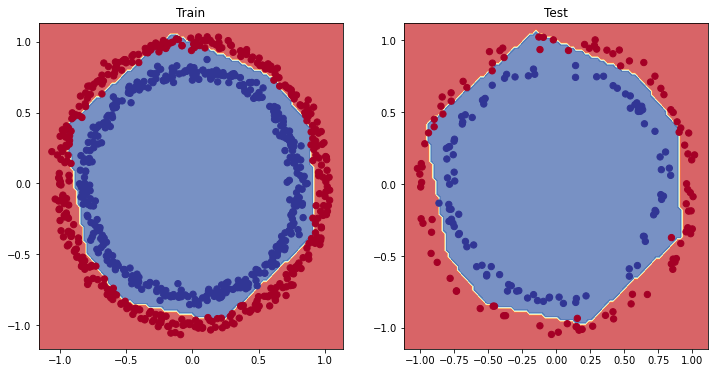

In [53]:
# Plot the decision boundary for training and test set

plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

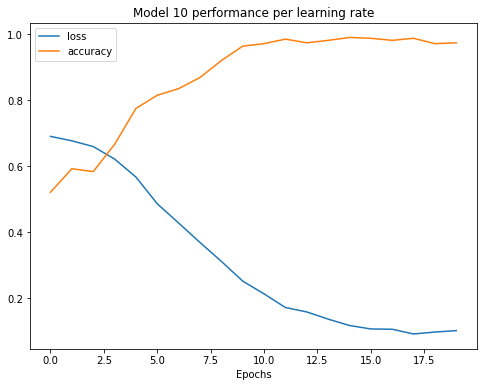

In [54]:
# Model 10 performance
history_df10 = pd.DataFrame(history_10.history)

history_df10.plot(figsize=(8,6))

plt.xlabel("Epochs")
plt.title("Model 10 performance per learning rate");

## Some common classification evaluation methods

keys: tp= True Positive, tn= True Negative, fp= False Positive, fn= False Negative

### 1. Accuracy

* Formula: (tp+tn) / (tp+tn+fp+fn)
* Code: `tf.keras.metrics.Accuracy()` or `sklearn.metrics.accuracy_score()`
* When to use: Default metric for classification problems. Not the best for imbalanced classes.

### 2. Precision

* Formula: (tp) / (tp+fp)
* Code: `tf.keras.metrics.Precision()` or `sklearn.metrics.precision_score()`
* When to use: Higher precision leads to less false psitives.

### 3. Recall

* Formula: (tp) / (tp+fn)
* Code: `tf.keras.metrics.Recall()` or `sklearn.metrics.recall_score()`
* When to use: Higher recall leads to less false negatives.

📖:  Read [https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134](https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134) to understand the precision-recall tradeoff

### 4. F1-score

* Formula: 2 * (precision * recall) / (precision + recall)
* Code: `sklearn.metrics.f1_score()`
* When to use: Combination of precision and recall, usually a good overall metric for a classification model.

### 5. Confusion matrix

* Formula: none
* Code: custom function or `sklearn.metrics.confusion_matrix()`
* When to use: When comparing predictions to truth labels to where model gets confused. Can be hard to use with large number of classes.

### 6. Classification report

* Formula: -
* Code: `sklearn.metrics.classification_report()`
* When to use: -

## Finding a model accuracy

In [55]:
# Check accuracy of our model
loss_10, accuracy_10 = model_10.evaluate(X_test, y_test)
loss_10, accuracy_10

7/7 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9400


(0.15353447198867798, 0.9399999976158142)

## Creating confusion matrix

In [56]:
# Making predictions
y_preds_10 = model_10.predict(X_test)
y_preds_10

7/7 [==============================] - 0s 2ms/step


array([[0.9921405 ],
       [0.99966675],
       [0.9938357 ],
       [0.99156564],
       [0.36057192],
       [0.0537768 ],
       [0.9902658 ],
       [0.10281046],
       [0.9974141 ],
       [0.32035297],
       [0.9934196 ],
       [0.6240696 ],
       [0.9965269 ],
       [0.99677885],
       [0.99527186],
       [0.9961648 ],
       [0.93415576],
       [0.9877705 ],
       [0.04684608],
       [0.9930182 ],
       [0.0500959 ],
       [0.9751032 ],
       [0.99493945],
       [0.9908885 ],
       [0.01559891],
       [0.97905666],
       [0.9989751 ],
       [0.6505641 ],
       [0.18595257],
       [0.9948751 ],
       [0.12868264],
       [0.937017  ],
       [0.9950186 ],
       [0.63360184],
       [0.09430553],
       [0.95933414],
       [0.9993064 ],
       [0.8685634 ],
       [0.9991117 ],
       [0.9969663 ],
       [0.99741805],
       [0.99163604],
       [0.9918918 ],
       [0.01335661],
       [0.998179  ],
       [0.9956238 ],
       [0.99440014],
       [0.008

In [57]:
# TODO: uncomment code in this cell so that its error appears

# Create confusion matrix
# confusion_matrix(y_test, y_preds_10)

Looking at the error, `can't handle a mix of binary and continuous targets`, it seems like one the arguments passed to the confusion_matrix() contains binary values (surely the truth value, in the form 0 and 1), while the others arguments is in the form of continuous values.            
Let's check the content of the two arguments.

In [58]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [59]:
y_preds_10[:10]

array([[0.9921405 ],
       [0.99966675],
       [0.9938357 ],
       [0.99156564],
       [0.36057192],
       [0.0537768 ],
       [0.9902658 ],
       [0.10281046],
       [0.9974141 ],
       [0.32035297]], dtype=float32)

We can confirm that `y_test` contains discrete values while `y_preds_10` contains continuous values.   
The predictions should contains the same type of data as the labels.

`y_preds_10` has come out in **prediction probability** form, the standard output from the sigmoid (or softmax) activation functions. We need to convert them: the closer the value is to one, the more the model thinks that it's a 1 label; and the closer the value is to zero, the more the model thinks that it's a 0 label.
So, anything higher than 0.5 will go to label 1, and other values will go to label 0.

In [60]:
# Convert prediction probability to binary format
tf.round(y_preds_10)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [61]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds_10))

array([[89, 12],
       [ 0, 99]], dtype=int64)

## Plot confusion matrix

Step: normalize the confusion matrix

In [62]:
cm = confusion_matrix(y_test, tf.round(y_preds_10))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
cm_norm

array([[0.88118812, 0.11881188],
       [0.        , 1.        ]])

In [63]:
# Code testing
cm.sum(axis=1)

array([101,  99], dtype=int64)

In [64]:
# Code testing
cm.sum(axis=1)[:,np.newaxis]

array([[101],
       [ 99]], dtype=int64)

Step: retrieve the number of classes

In [65]:
cm = confusion_matrix(y_test, tf.round(y_preds_10))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix

n_classes= cm.shape[0]

n_classes

2

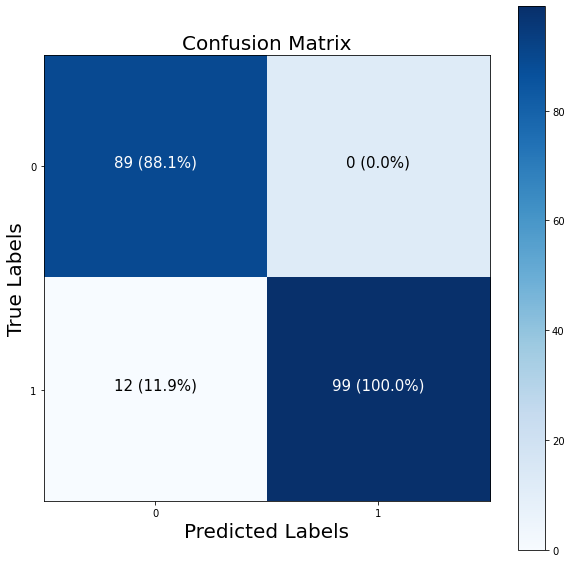

In [66]:
cm = confusion_matrix(y_test, tf.round(y_preds_10))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix

n_classes= cm.shape[0] # Retrieve the number of classes

fig, ax = plt.subplots(figsize=(10,10))

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) 
fig.colorbar(cax)

# Create classes
classes=False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
# Label the axes
ax.set(title="Confusion Matrix", xlabel="Predicted Labels", ylabel="True Labels", 
       xticks=np.arange(n_classes), xticklabels=labels,
       yticks=np.arange(n_classes), yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)


# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for r, c in itertools.product( range(cm.shape[0]), range(cm.shape[1]) ):
    plt.text(r,c, 
             f"{cm[r,c]} ({cm_norm[r,c]*100:.1f}%)", # set text to print
            horizontalalignment="center", # set text alignment
            color="white" if cm[r,c]>threshold else "black", # set text color
             size=15
            )

📖 Here is another way to plot a confusion matrix: [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

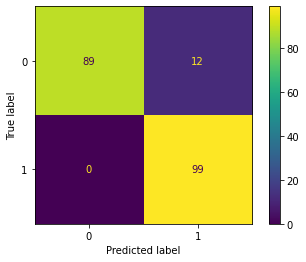

In [67]:
cm2 = confusion_matrix(y_test, tf.round(y_preds_10), labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=[0,1])
disp.plot()
plt.show()

# Multi-class classification

When we have more than two classes as an option, it's know as multi-class classfication. For example, we want to predict whether a piece of clothing is a shoe, a shirt, or a jacket.    
With a few tweaks, everything that was seen for binary classification can also be applied to multi-class classifications.

## Getting the dataset

**Dataset used for this learning**: [Tensorflow MNIST dataset](https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=fr) 

**Dataset description**: *Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.*

Each training and test example is assigned to one of the following labels:
* 0	: T-shirt/top
* 1	: Trouser
* 2	: Pullover
* 3	: Dress
* 4	: Coat
* 5	: Sandal
* 6	: Shirt
* 7	: Sneaker
* 8	: Bag
* 9	: Ankle boot

In [68]:
# Retrieve the training and test sets from the mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [69]:
# First training sample
print(f"First Training sample: \n {train_data[0]}")

First Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0  

In [70]:
# First training label
print(f"First Training label: \n {train_labels[0]}")

First Training label: 
 9


In [71]:
train_data.shape

(60000, 28, 28)

In [72]:
test_data.shape

(10000, 28, 28)

In [73]:
train_labels.shape

(60000,)

In [74]:
test_labels.shape

(10000,)

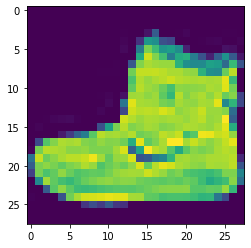

In [75]:
# Plot the first sample
plt.imshow(train_data[0]);

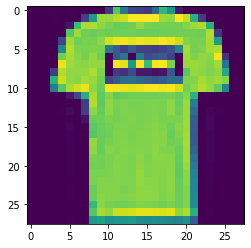

In [76]:
# Plot the second sample
plt.imshow(train_data[1]);

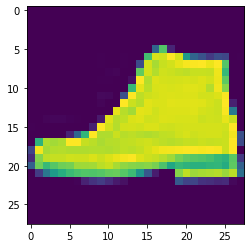

In [77]:
# Plot another sample
plt.imshow(train_data[42]);

In [78]:
# Create an index for the labels to make them human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

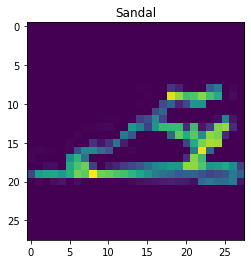

In [79]:
# Plot another sample with its label
choice_idx = 300
plt.imshow(train_data[choice_idx])
plt.title(class_names[train_labels[choice_idx]]);

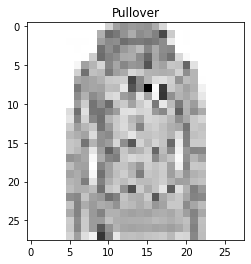

In [80]:
# Plot another sample in grayscale with its label
choice_idx = 4500
plt.imshow(train_data[choice_idx], cmap=plt.cm.binary)
plt.title(class_names[train_labels[choice_idx]]);

In [81]:
# Plot multiple random samples
def plot_random_samples():
    """ Plot random samples in the training dataset """
    plt.figure(figsize=(7,7))
    for i in range(4):
        ax = plt.subplot(2,2, i+1)
        rand_idx = random.choice( range( train_data.shape[0] ) )
        plt.imshow( train_data[rand_idx], cmap=plt.cm.binary)
        plt.title( class_names[ train_labels[rand_idx] ] )
        plt.axis(False)

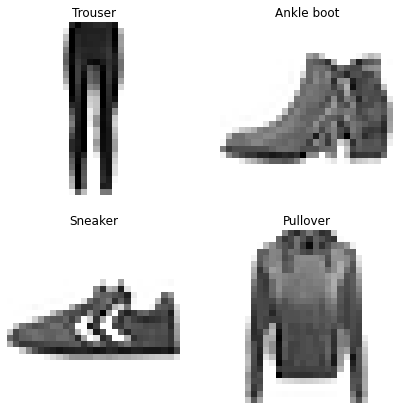

In [82]:
plot_random_samples()

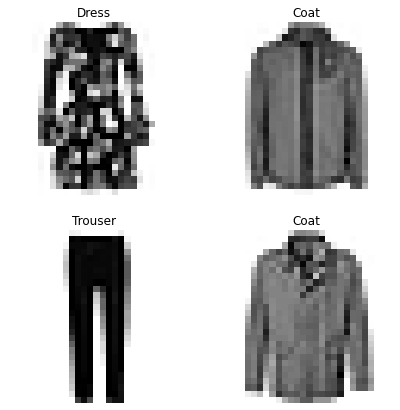

In [84]:
plot_random_samples()

## Building a multi-class classification model

For the multi-class classification model, we can use a similar architecture to the binary classifiers; however, we are going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation function = Softw

In [85]:
# Checking the input shape
train_data[0].shape

(28, 28)